# Task #2 - To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the hours they studied. This is a simple linear regression task as it involves just two variable Data can be at  http://bit.ly/w-data

What will be predicted score if a student studies for 9.25 hrs in a day?

In [35]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Database

In [36]:
url= "http://bit.ly/w-data"
table= pd.read_csv(url)
table.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualizing the Data

Text(0, 0.5, 'Percentages')

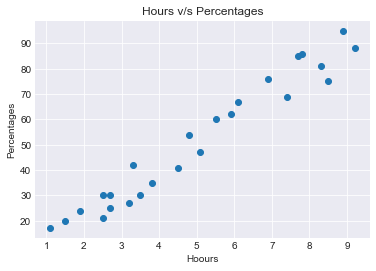

In [37]:
from scipy import stats

plt.style.use('seaborn-darkgrid')
plt.scatter(table.Hours,table.Scores)
plt.title('Hours v/s Percentages')
plt.xlabel('Hoours')
plt.ylabel('Percentages')

# Wrap-up of Statistics about the Numerical Columns in a Dataset

In [38]:
table.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
table1 = table.corr()
table1.head()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting the Dataset into Training and Testing Set 

In [40]:
x=table.Hours.values.reshape(-1, 1)
y=table.Scores.values

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Training

In [42]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression().fit(x_train, y_train)

# Visualising the Trained and Tested set

<function matplotlib.pyplot.show(*args, **kw)>

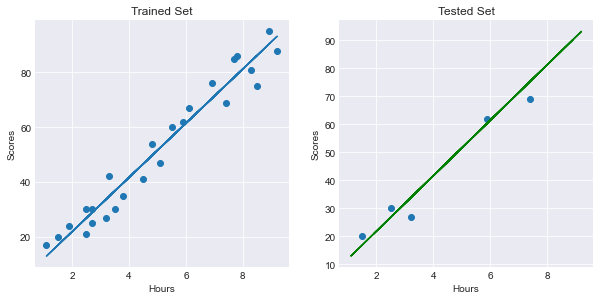

In [43]:
fig = plt.figure(figsize =(10,10))
mx1 = plt.subplot(221)
mx2 = plt.subplot(222)

line = regress.coef_*x+regress.intercept_

mx1.scatter(x,y)
mx1.plot(x,line)
plt.show
mx1.set_title('Trained Set')
mx1.set_xlabel('Hours')
mx1.set_ylabel('Scores')

mx2.scatter(x_test, y_test)
mx2.plot(x_train, regress.predict(x_train), c="g")
mx2.set_title('Tested Set')
mx2.set_xlabel('Hours')
mx2.set_ylabel('Scores')
plt.show

In [44]:
predicted_y = regress.predict(x_test)

In [45]:
table2 = pd.DataFrame({'Actual':y_test, 'Predicted':predicted_y})
table2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


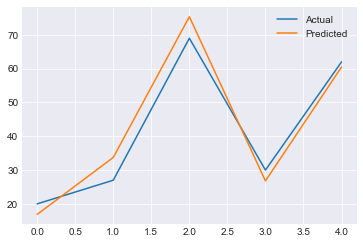

In [46]:
table2.plot(kind='line')

# Predicting the score of a student according to the hour he/she studied

In [ ]:
hours = float(input('Enter the no. of hours:'))
own_pred = regress.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

# Evaluating the Model Performance
## R Square Method: 
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [ ]:
from scipy import stats
slope , intercept, r, p, std_err = stats.linregress(y_test, predicted_y)
print('R-Squared error:',r)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [ ]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, predicted_y))
print(math.sqrt(mean_squared_error(y_test, predicted_y)))